In [82]:
# Importation des bibliothèques utilisées pour cet exemple
import matplotlib.pyplot as plt
import numpy as np
import imageio as iio
import skimage

Profitons du fais que l'oeil humain a généralement moins de sensibilité à la couleur bleue pour créer une image mystère contenant une photo de chaton.

In [3]:
# Lecture d'un ficher image (utilisé l'image 1)
# Utilisez imageio.imread
img1 = imageio.imread("image_00.jpg")

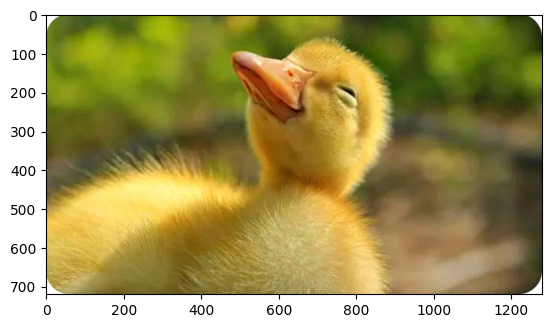

In [4]:
# Affichage d'une image : Utilisez matplotlib (plt.imshow() et plt.show())
plt.imshow(img1)
plt.show()

In [4]:
# Affichage de quelques informations au sujet de l'image (utilisez les attributes de la classe ndarray à laquelle appartient la variable img1)


(720, 1280, 3) uint8
[164 176  14]
[164 176  14]


In [6]:
# Répéter pour les deux autres images
img2 = imageio.imread("image_01.jpg")


In [7]:
img3 = imageio.imread("image_02.jpg")

In [22]:
# Calculer la dimension minimale parmi les 3 images en X et en Y (utiliser la méthode .shape, et la fonction min)

shapes = [img.shape for img in [img1, img2, img3]]
minY = min([y[0] for y in shapes])
print("minY : %d" % minY)

minX = min(shapes[0][1],shapes[1][1], shapes[2][1]) 
print("minX :",  minX)

# Formatted string avec comme f'string'

minY : 720
minX : 1280


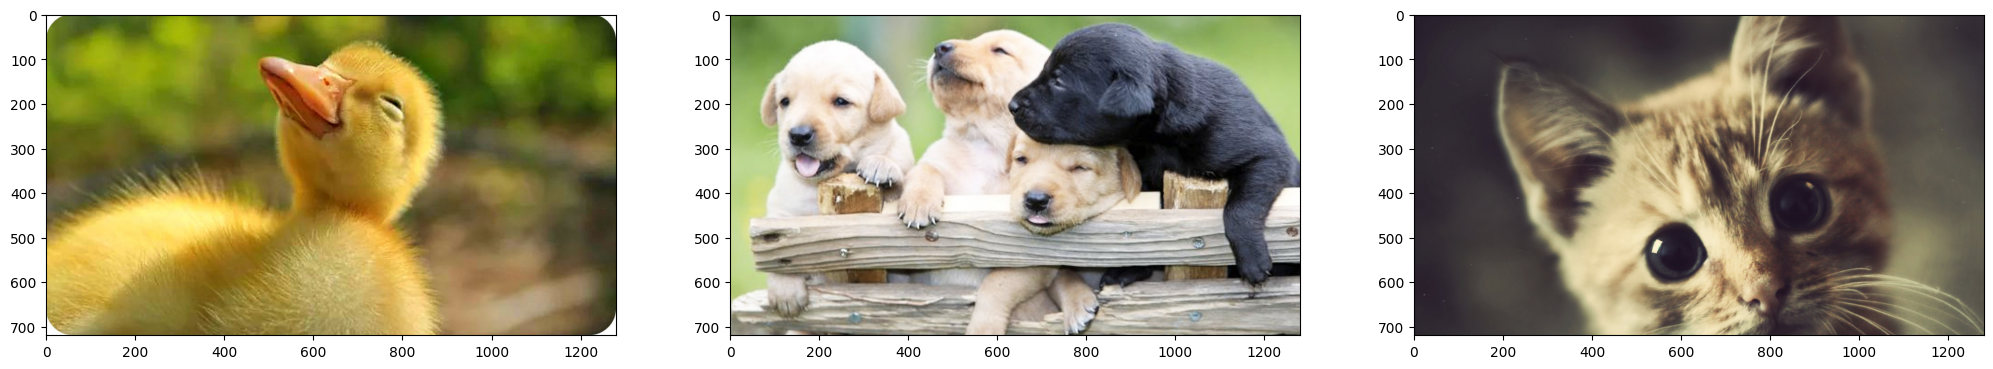

In [52]:
# Rogner les images selon la dimension calculée plus haut
img1_rognee = img1[0:minY:1,0:minX:1, 0::1]
img2_rognee = img2[:minY,:minX,:]
img3_rognee = img3[:minY,:minX]

fig, ax = plt.subplots(1, 3, figsize=(25, 25))

# You can now plot on the individual axes using the 'ax' array
ax[0].imshow(img1_rognee)
ax[1].imshow(img2_rognee)
ax[2].imshow(img3_rognee)

plt.show()File ~/Laboratoires-INF600F-Automne-2025/.venv/lib/python3.13/site-packages/PIL/Image.py:3308, in fromarray(obj, mode)
   3307 try:
-> 3308     mode, rawmode = _fromarray_typemap[typekey]
   3309 except KeyError as e:

KeyError: ((1, 1, 3), '<f8')

The above exception was the direct cause of the following exception:

TypeError                                 Traceback (most recent call last)
Cell In[81], line 3
      1 # Entregistrer l'image mytère sur disque sous format jpg
----> 3 iio.imwrite('saved.jpg', montage)
      4 print(montage.dtype)

File ~/Laboratoires-INF600F-Automne-2025/.venv/lib/python3.13/site-packages/imageio/v3.py:147, in imwrite(uri, image, plugin, extension, format_hint, **kwargs)
    105 """Write an ndimage to the given URI.
    106 
    107 The exact behavior depends on the file type and plugin used. To learn about
   (...)    136 
    137 """
    139 with imopen(
    140     uri,
    141     "w",
   (...)    145     extension=extension,
    146 ) as img_file:
--> 147     encoded = img_file.write(image, **kwargs)
    149 return encoded

File ~/Laboratoires-INF600F-Automne-2025/.venv/lib/python3.13/site-packages/imageio/plugins/pillow.py:444, in PillowPlugin.write(self, ndimage, mode, format, is_batch, **kwargs)
    441     ndimage = ndimage[None, ...]
    443 for frame in ndimage:
--> 444     pil_frame = Image.fromarray(frame, mode=mode)
    445     if "bits" in kwargs:
    446         pil_frame = pil_frame.quantize(colors=2 ** kwargs["bits"])

File ~/Laboratoires-INF600F-Automne-2025/.venv/lib/python3.13/site-packages/PIL/Image.py:3312, in fromarray(obj, mode)
   3310         typekey_shape, typestr = typekey
   3311         msg = f"Cannot handle this data type: {typekey_shape}, {typestr}"
-> 3312         raise TypeError(msg) from e
   3313 else:
   3314     deprecate("'mode' parameter", 13)

TypeError: Cannot handle this data type: (1, 1, 3), <f


In [53]:
# Convertir les images RGB en niveau de gris (moyenner tous les canaux). Utiliser la méthode .mean et le bon axe
img1_grey = np.mean(img1_rognee, axis=2) 
img2_grey = np.mean(img2_rognee, axis=2)
img3_grey = np.mean(img3_rognee, axis=2)


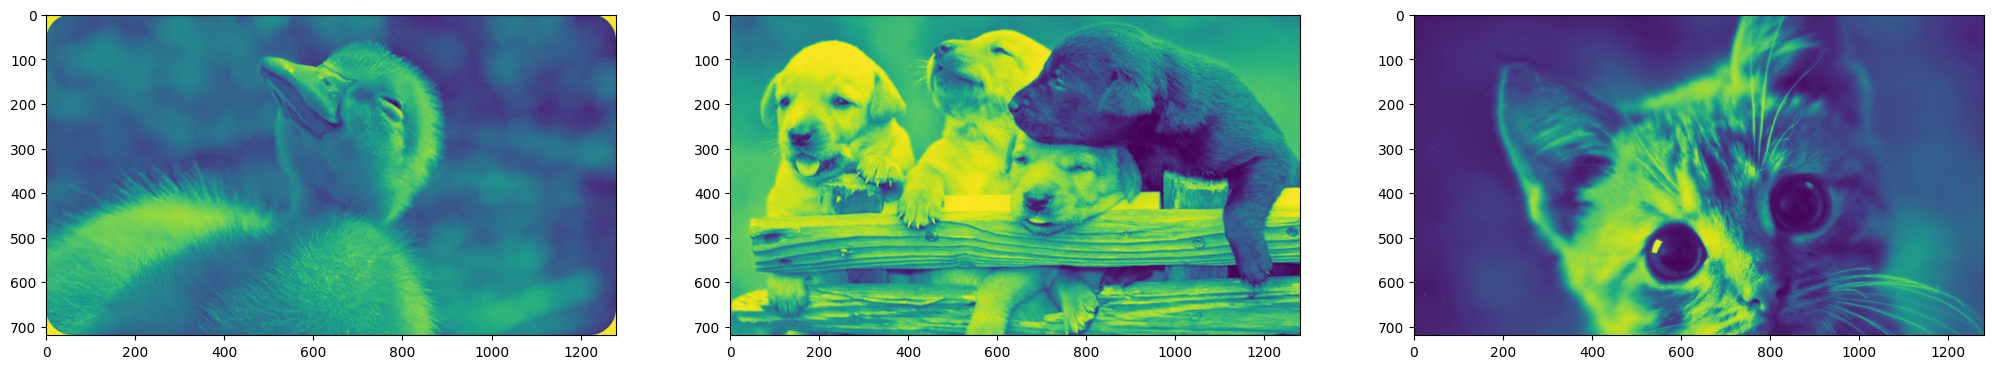

In [54]:
# Afficher les trois images dans une meme figure
# Note : utilisez plt.subplot

fig, ax = plt.subplots(1, 3, figsize=(25, 25))

# You can now plot on the individual axes using the 'ax' array
ax[0].imshow(img1_grey)
ax[1].imshow(img2_grey)
ax[2].imshow(img3_grey)

plt.show()


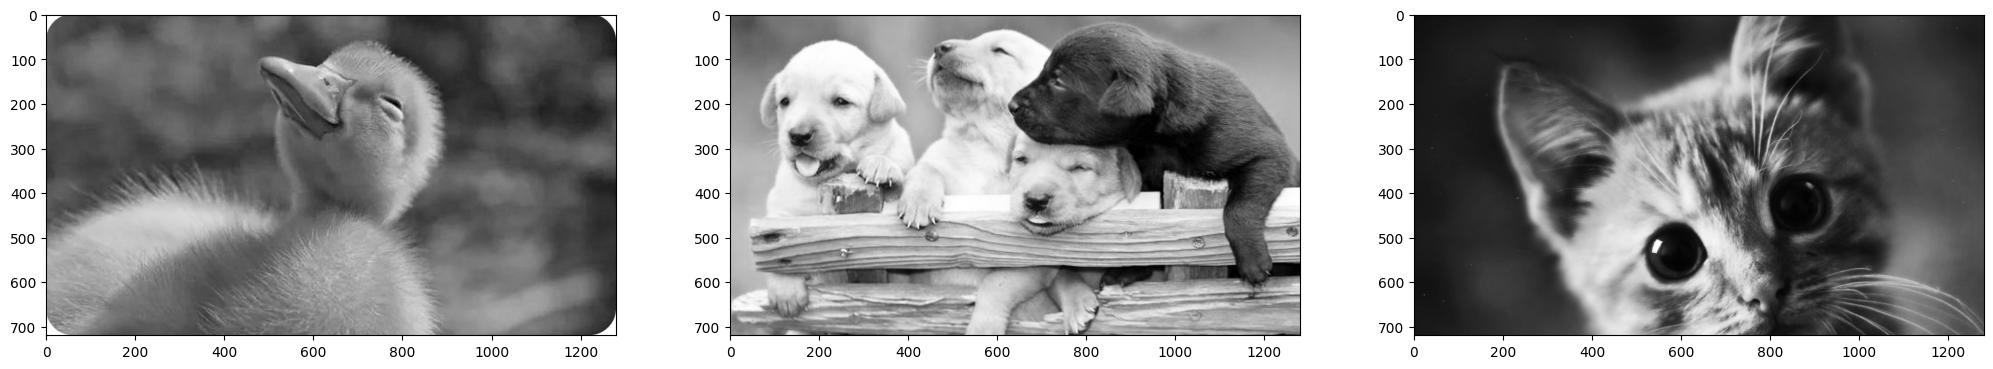

In [55]:
# Affichez les images en niveaux de gris (utilisez l'argument cmap='gray')

fig, ax = plt.subplots(1, 3, figsize=(25, 25))

# You can now plot on the individual axes using the 'ax' array
ax[0].imshow(img1_grey, cmap='gray')
ax[1].imshow(img2_grey, cmap='gray')
ax[2].imshow(img3_grey, cmap='gray')

plt.show()

0.00130718954248366 1.0
0.0 1.0
0.019915848527349234 0.2


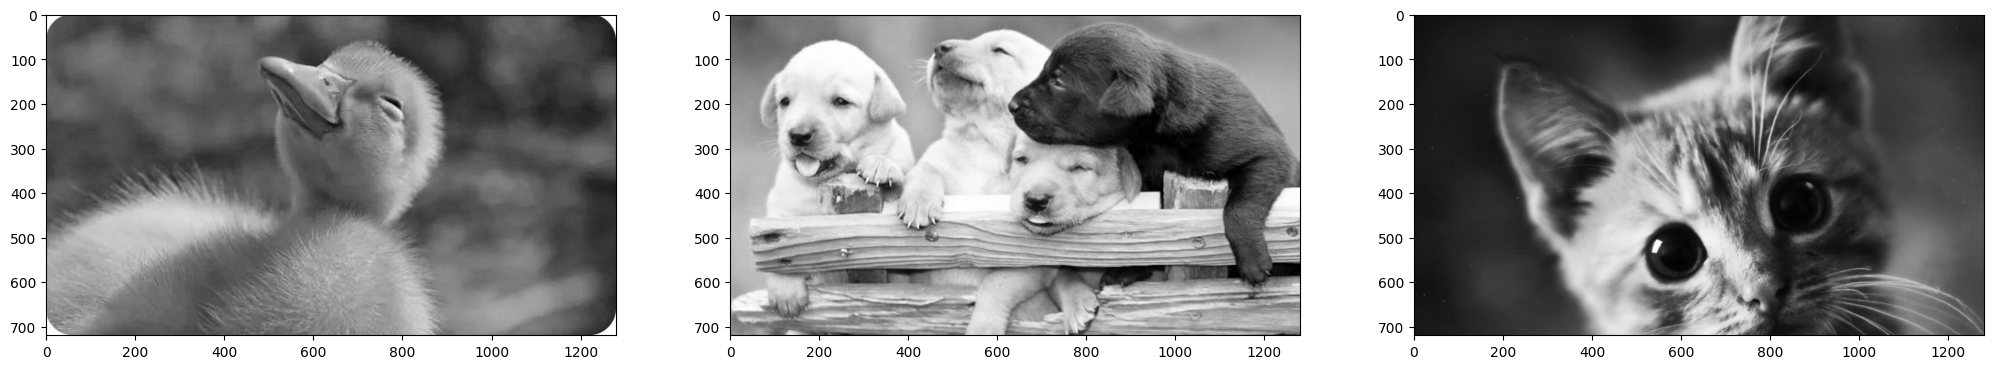

In [69]:
# Noramliser les intensités entre 0 et 1 pour les images 1 et 2, et entre 0 et 0.2 pour l'image 3.
# Utiliser: np.max

img1_max = np.max(img1_grey)
img1_norm = img1_grey / img1_max 
print(np.min(img1_norm), np.max(img1_norm))

img2_max = np.max(img2_grey)
img2_min = np.min(img2_grey)
img2_old_range = img2_max - img2_minimg2_max
img2_new_range = 1 - 0
img2_norm = (img2_grey - img2_min)  * (img2_new_range) / img2_old_range
print(np.min(img2_norm), np.max(img2_norm))

img3_max = np.max(img3_grey)
img3_norm = img3_grey / img3_max  * 0.2
print(np.min(img3_norm), np.max(img3_norm))

fig, ax = plt.subplots(1, 3, figsize=(25, 25))

# You can now plot on the individual axes using the 'ax' array
ax[0].imshow(img1_norm, cmap='gray')
ax[1].imshow(img2_norm, cmap='gray')
ax[2].imshow(img3_norm, cmap='gray')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

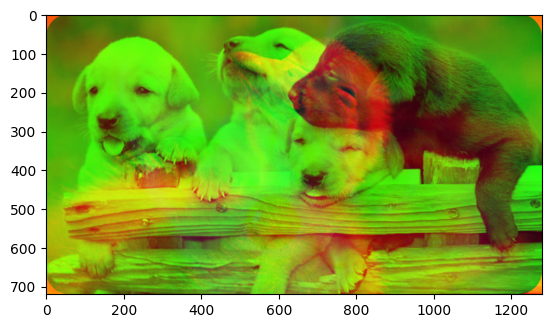

In [75]:
# Combiner les images (utilisé np.stack(..., axis=2)) pour créer 
montage = np.stack([img1_norm, img2_norm, img3_norm], axis=2)

plt.imshow(montage)
plt.show

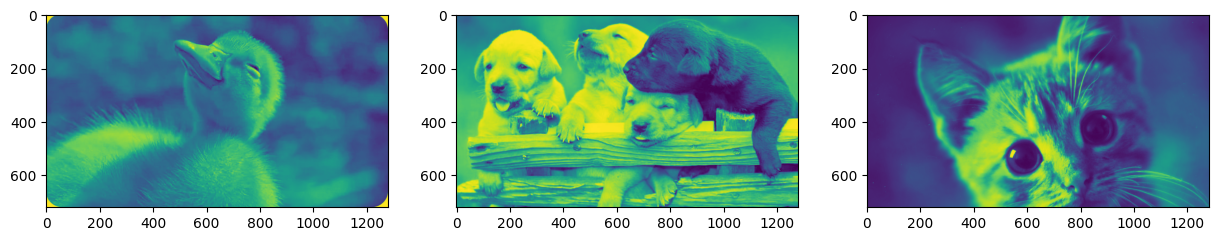

In [76]:
# Afficher les 3 canaux couleurs (indexation de l'axe 2)
f, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(montage[:,:,0])
ax[1].imshow(montage[:,:,1])
ax[2].imshow(montage[:,:,2])

In [93]:
# Entregistrer l'image mytère sur disque sous format jpg

print(montage.dtype)

montage_8bit = (montage * 255) .astype(np.uint8)

iio.imsave('saved.jpeg', montage_8bit)


float64


In [27]:
# Modifier le format des pixels de l'image ne plus recevoir l'avertissement précédent. 
# * Utiliser la méthode .astype() de la classe ndarray, et le format de donnée np.uint8.
# N'oublier pas d'ajuster l'étendue des valeurs pour éviter la saturation de votre image.

# Enregistrer cette image sous un autre nom


# Suggestion de modification
* Au lieu de rogner les images, utiliser les fonctions disponibles dans le module `skimage.transform` pour redimensionner les images avant de les combiner


# Utilisation de isbnlib
* Ajouter `isbnlib` dans votre requirements.txt : 
    * Vous pouvez spécifier la version avec en écrivant `isbnlib==3.10.14`
    * Exécuter la commande d'installation des dépendances `pip install -r requirements.txt`


In [7]:
# importer la bibliothèque 
from isbnlib import meta, canonical

ISBN = "978-0446310789

In [8]:
isbn_canonique = ... # tranforme l'ISBN en sa forme canonique (avec des chiffres seulement)
data = ... # donne les métadonnées sous la forme d'un dictionnaire

In [9]:
# imprimer le dictionnaire de données 


{'ISBN-13': '9780446310789', 'Title': 'To Kill A Mockingbird', 'Authors': ['Harper Lee'], 'Publisher': 'Grand Central Publishing', 'Year': '1988', 'Language': 'en'}


In [10]:
# imprimer la date de publication


1988
